# Logistic Regression Consulting Project

## Binary Customer Churn

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

The data is saved as customer_churn.csv. Here are the fields and their definitions:

    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Ads Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of websites that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address
    Company: Name of Client Company
    
Once you've created the model and evaluated it, test out the model on some new data (you can think of this almost like a hold-out set) that your client has provided, saved under new_customers.csv. The client wants to know which customers are most likely to churn given this data (they don't have the label yet).

## EDA with pandas and visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [50]:
eda = pd.read_csv('../datasets/customer_churn.csv')
eda.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [6]:
eda.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,41.816667,10062.824033,0.481111,5.273156,8.587778,0.166667
std,6.127560,2408.644532,0.499921,1.274449,1.764836,0.372885
min,22.000000,100.000000,0.000000,1.000000,3.000000,0.000000
25%,38.000000,8497.122500,0.000000,4.450000,7.000000,0.000000
50%,42.000000,10045.870000,0.000000,5.215000,8.000000,0.000000
75%,46.000000,11760.105000,1.000000,6.110000,10.000000,0.000000
max,65.000000,18026.010000,1.000000,9.150000,14.000000,1.000000


<AxesSubplot:xlabel='Churn', ylabel='count'>

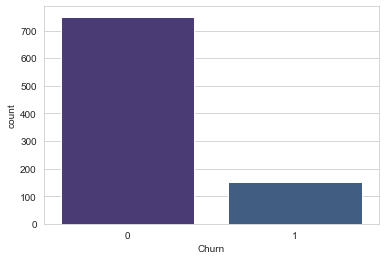

In [13]:
sns.countplot(x='Churn', data=eda)

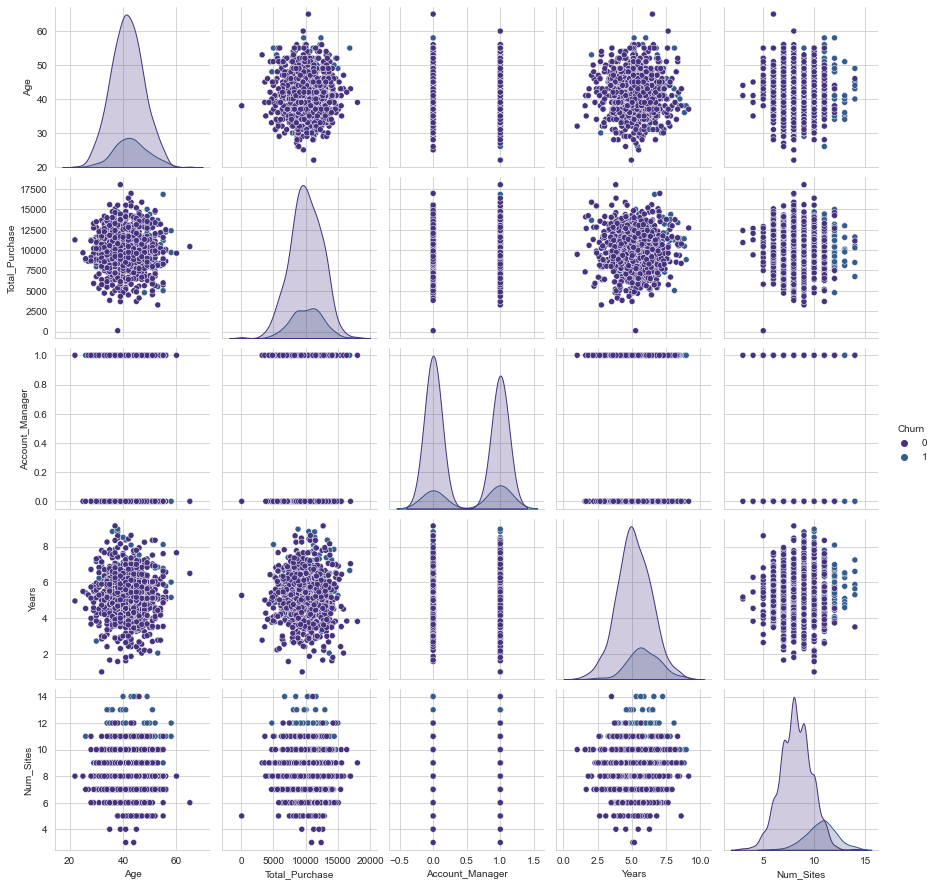

In [16]:
sns.pairplot(data=eda, hue='Churn')

<AxesSubplot:xlabel='Account_Manager', ylabel='count'>

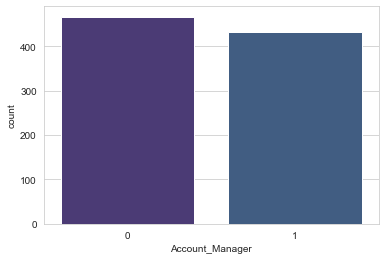

In [25]:
sns.countplot(x='Account_Manager', data=eda)

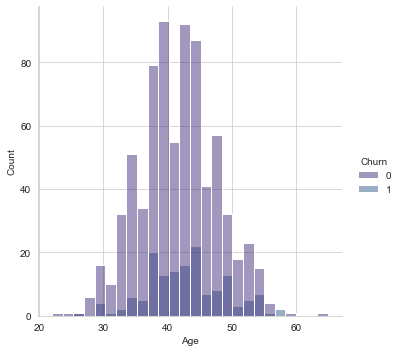

In [24]:
sns.displot(x='Age', data=eda, hue='Churn')

<AxesSubplot:xlabel='Num_Sites', ylabel='count'>

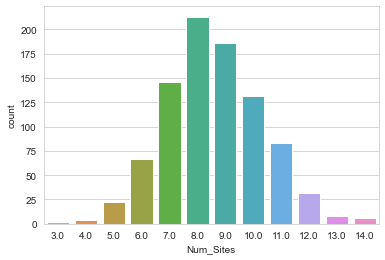

In [27]:
sns.countplot(x='Num_Sites', data=eda)

In [57]:
eda.corr()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,year,month,day,dayofweek,hour
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926,0.001595,0.010280,0.016058,0.028879,-0.019955
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031,-0.024631,0.044835,0.007694,0.060623,-0.004317
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611,0.018814,0.028979,0.028306,-0.066263,-0.024162
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329,-0.046624,0.015855,0.034310,-0.000375,-0.016724
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398,-0.032777,0.008457,0.022000,0.032593,-0.045056
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000,-0.040150,0.019080,0.034398,0.019704,-0.035145
year,0.001595,-0.024631,0.018814,-0.046624,-0.032777,-0.040150,1.000000,-0.039077,-0.033002,-0.010150,0.051154
month,0.010280,0.044835,0.028979,0.015855,0.008457,0.019080,-0.039077,1.000000,0.005801,-0.004172,-0.003563
day,0.016058,0.007694,0.028306,0.034310,0.022000,0.034398,-0.033002,0.005801,1.000000,-0.016658,-0.073284
dayofweek,0.028879,0.060623,-0.066263,-0.000375,0.032593,0.019704,-0.010150,-0.004172,-0.016658,1.000000,-0.048162


<AxesSubplot:>

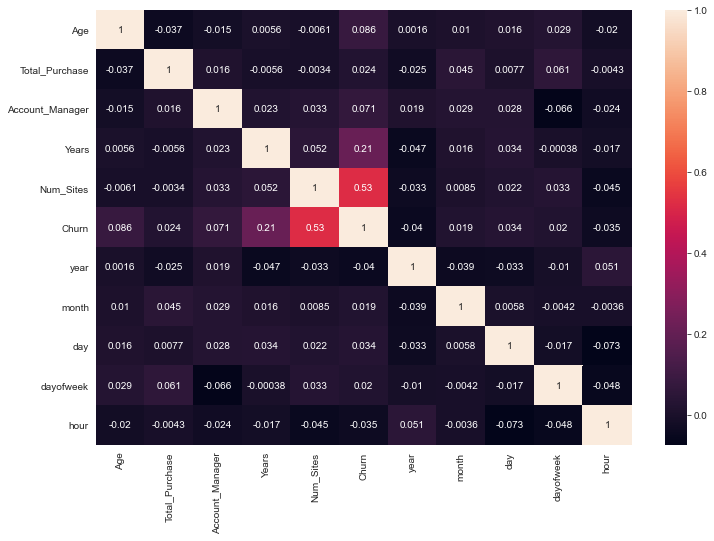

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(eda.corr(), annot=True)

Based on the heatmap, `Num_Sites` and `Years` correlate most with `Churn`

In [33]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [29]:
eda['Company'].value_counts()

Anderson Group                  4
Williams PLC                    3
Wilson PLC                      3
Wise Inc                        2
Smith and Sons                  2
                               ..
Carter, Johnson and Franklin    1
Woods, Herrera and Fritz        1
Roberts-Schaefer                1
Owens Group                     1
Martinez, Ochoa and Jennings    1
Name: Company, Length: 873, dtype: int64

In [32]:
eda['Names'].value_counts()

Jennifer Wood      2
Jeffrey Trevino    1
Charles Schultz    1
Randall Weber      1
Doris Wilkins      1
                  ..
Erin Hall          1
Monica Downs       1
Charles Doyle      1
Jesse Mitchell     1
Brandon Ortiz      1
Name: Names, Length: 899, dtype: int64

These will not be used

In [35]:
eda['Location'].value_counts()

731 Danielle Roads Suite 482 Lisaburgh, ME 92139              1
018 Kristy Mountain Lindseymouth, LA 51400                    1
6926 Martin Ramp Thomastown, AZ 58814                         1
858 Booth Points South Davidside, AZ 92136-1145               1
Unit 5568 Box 1967 DPO AE 15638                               1
                                                             ..
742 Ortiz Street Apt. 568 Robertland, AS 94732-7050           1
55004 Schmidt Fort Apt. 448 North Samanthaland, AR 63822      1
599 Graham Courts North Katherine, WI 92642                   1
3880 Denise Curve South Christopher, NC 79432                 1
63080 Christopher Fork Suite 353 Jacobshire, TN 98279-1399    1
Name: Location, Length: 900, dtype: int64

In [36]:
eda['Location'].tail(10)

890     6239 Timothy Overpass Carmenhaven, FM 05708-0772
891    339 Jeffrey River Suite 638 Fergusonville, DC ...
892    276 Thompson Field Apt. 992 South Victoriaton,...
893      393 Stephens Field South Michelleside, MI 26930
894           00154 Ashley Course Shannonville, UT 52907
895    9316 Julian Fort Suite 328 North Leslie, ME 43961
896    8419 William Square Apt. 695 Martinville, RI 3...
897                 Unit 8633 Box 8738 DPO AA 14126-5026
898    49800 Torres Ways Suite 886 West Bradleybury, ...
899         27252 Olivia Burgs Rivasmouth, MN 80121-6348
Name: Location, dtype: object

In [37]:
eda['Location'].sample(20)

175               143 Andrea Flat Lake Michael, ID 33149
799    226 Riley Neck Suite 180 Kristopherbury, LA 76071
815    059 Sara Lodge Suite 123 Moorefurt, HI 95162-5163
158    00103 Jeffrey Crest Apt. 205 Padillaville, IA ...
41     52454 Jessica Passage Apt. 097 Mitchellburgh, ...
34     234 Gonzalez Terrace Santiagohaven, CO 28918-5500
609          1615 Angela Valley Henryfurt, ID 45145-3704
672          3028 Robles Road South Megan, CT 13834-0339
496        3046 Harrison Plains Montgomeryberg, ID 86180
529        6113 Jerome Locks North Trevormouth, GA 25773
124                 Unit 6345 Box 0137 DPO AP 41134-6292
750         97254 Ward Stravenue North Melanie, DE 04764
702    9411 Robinson Corners Apt. 595 North Samuelbor...
718           9373 Carpenter Spur Michellebury, UT 07973
570                 Unit 0590 Box 7532 DPO AE 12062-5301
195    63139 Kristin Locks Suite 522 Lambton, WI 6072...
291           227 Jennifer Park Smithbury, TN 22659-9788
357           4331 Tyler Fall W

The numbers at the start and the end, as well as the state IDs could be extracted if only they are consistent in length. For that reason, we won't be using this feature too.

In [38]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [39]:
eda['Onboard_date']

0      2013-08-30 07:00:40
1      2013-08-13 00:38:46
2      2016-06-29 06:20:07
3      2014-04-22 12:43:12
4      2016-01-19 15:31:15
              ...         
895    2007-12-01 13:29:34
896    2008-12-28 15:23:58
897    2014-06-20 05:10:09
898    2012-05-30 00:15:43
899    2010-09-25 12:16:08
Name: Onboard_date, Length: 900, dtype: object

In [51]:
eda['Onboard_date'] = pd.to_datetime(eda['Onboard_date'])

In [41]:
eda['Onboard_date']

0     2013-08-30 07:00:40
1     2013-08-13 00:38:46
2     2016-06-29 06:20:07
3     2014-04-22 12:43:12
4     2016-01-19 15:31:15
              ...        
895   2007-12-01 13:29:34
896   2008-12-28 15:23:58
897   2014-06-20 05:10:09
898   2012-05-30 00:15:43
899   2010-09-25 12:16:08
Name: Onboard_date, Length: 900, dtype: datetime64[ns]

In [52]:
eda['year'] = eda['Onboard_date'].apply(lambda x: x.year)
eda['month'] = eda['Onboard_date'].apply(lambda x: x.month)
eda['day'] = eda['Onboard_date'].apply(lambda x: x.day)
eda['dayofweek'] = eda['Onboard_date'].apply(lambda x: x.dayofweek)
eda['hour'] = eda['Onboard_date'].apply(lambda x: x.hour)

In [53]:
eda.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,year,month,day,dayofweek,hour
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,2013,8,30,4,7
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,2013,8,13,1,0
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,2016,6,29,2,6
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,2014,4,22,1,12
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,2016,1,19,1,15


<AxesSubplot:xlabel='year', ylabel='count'>

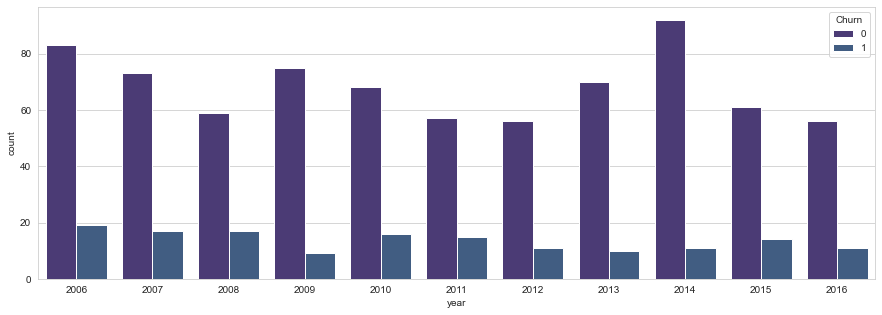

In [173]:
plt.figure(figsize=(15, 5))
sns.countplot(x='year', data=eda, hue='Churn')

<AxesSubplot:xlabel='month', ylabel='count'>

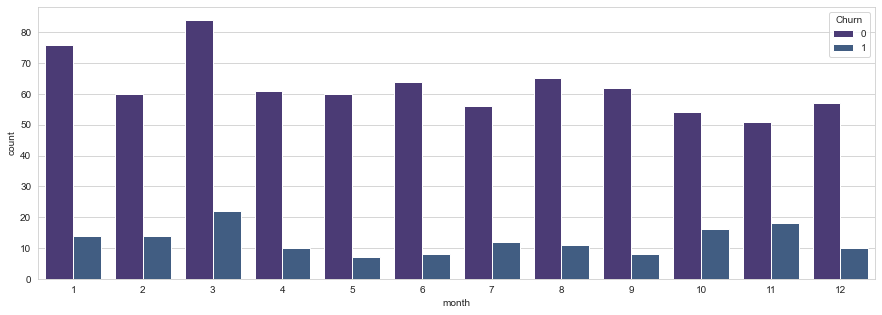

In [172]:
plt.figure(figsize=(15, 5))
sns.countplot(x='month', data=eda, hue='Churn')

<AxesSubplot:xlabel='day', ylabel='count'>

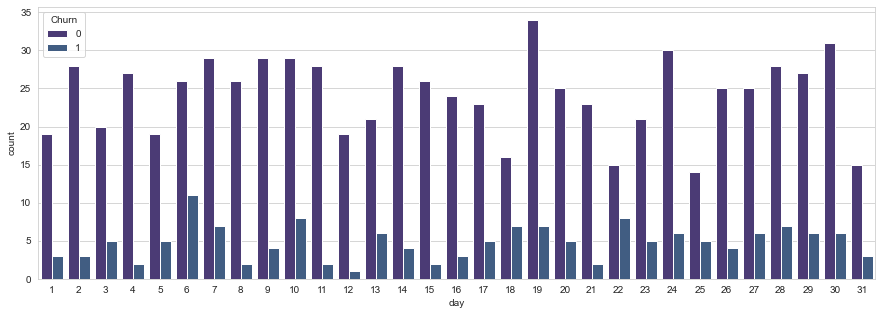

In [175]:
plt.figure(figsize=(15, 5))
sns.countplot(x='day', data=eda, hue='Churn')

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

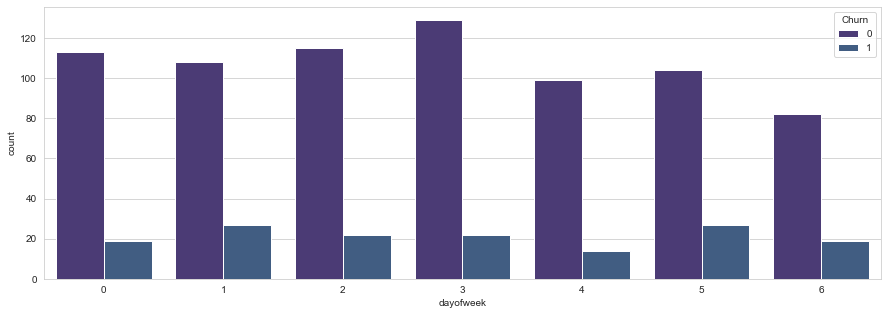

In [171]:
plt.figure(figsize=(15, 5))
sns.countplot(x='dayofweek', data=eda, hue='Churn')

<AxesSubplot:xlabel='hour', ylabel='count'>

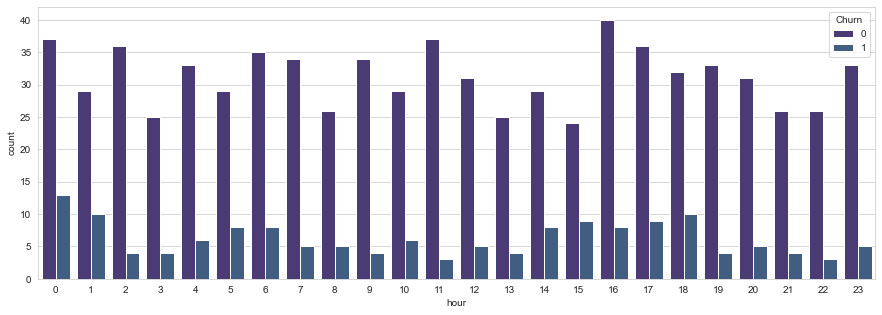

In [170]:
plt.figure(figsize=(15, 5))
sns.countplot(x='hour', data=eda, hue='Churn')

In [54]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Names            900 non-null    object        
 1   Age              900 non-null    float64       
 2   Total_Purchase   900 non-null    float64       
 3   Account_Manager  900 non-null    int64         
 4   Years            900 non-null    float64       
 5   Num_Sites        900 non-null    float64       
 6   Onboard_date     900 non-null    datetime64[ns]
 7   Location         900 non-null    object        
 8   Company          900 non-null    object        
 9   Churn            900 non-null    int64         
 10  year             900 non-null    int64         
 11  month            900 non-null    int64         
 12  day              900 non-null    int64         
 13  dayofweek        900 non-null    int64         
 14  hour             900 non-null    int64    

In [62]:
eda.isna().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
year               0
month              0
day                0
dayofweek          0
hour               0
dtype: int64

**What to do when using spark:**
* Not using `Names`, `Location`, and `Company`
* Convert `Onboard_date` to datetime and extract year, month, day, dayofweek, and hour

## Spark

In [60]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('churn').getOrCreate()

In [158]:
df = spark.read.csv('../datasets/customer_churn.csv', inferSchema=True, header=True)
df.show()

+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     

In [63]:
df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



**Convert `Onboard_date` into date type**

In [159]:
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, hour

new_df = df.withColumn('record_date', df['Onboard_date'].cast(TimestampType()))

In [160]:
new_df = new_df.withColumn('onboard_year', year(new_df['record_date']))
new_df = new_df.withColumn('onboard_month', month(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofmonth', dayofmonth(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofweek', dayofweek(new_df['record_date']))
new_df = new_df.withColumn('onboard_hour', hour(new_df['record_date']))

In [161]:
new_df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- record_date: timestamp (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)



In [162]:
new_df.select(['record_date', 'onboard_year', 'onboard_month', 'onboard_dayofmonth', 'onboard_dayofweek', 'onboard_hour']).show()

+-------------------+------------+-------------+------------------+-----------------+------------+
|        record_date|onboard_year|onboard_month|onboard_dayofmonth|onboard_dayofweek|onboard_hour|
+-------------------+------------+-------------+------------------+-----------------+------------+
|2013-08-30 07:00:40|        2013|            8|                30|                6|           7|
|2013-08-13 00:38:46|        2013|            8|                13|                3|           0|
|2016-06-29 06:20:07|        2016|            6|                29|                4|           6|
|2014-04-22 12:43:12|        2014|            4|                22|                3|          12|
|2016-01-19 15:31:15|        2016|            1|                19|                3|          15|
|2009-03-03 23:13:37|        2009|            3|                 3|                3|          23|
|2016-12-05 03:35:43|        2016|           12|                 5|                2|           3|
|2006-03-0

**Finalizing which features to use**

In [183]:
final_df = new_df.select(['Churn',
                          'Age',
                          'Total_Purchase',
                          'Account_Manager',
                          'Years',
                          'Num_Sites',
                          'onboard_year',
                          'onboard_month',
                          'onboard_dayofmonth',
                          'onboard_dayofweek',
                          'onboard_hour'])

In [184]:
final_df.printSchema()

root
 |-- Churn: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)



In [187]:
final_df.head(1)

[Row(Churn=1, Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, onboard_year=2013, onboard_month=8, onboard_dayofmonth=30, onboard_dayofweek=6, onboard_hour=7)]

**Assemble into `features` and `Churn`**

In [186]:
from pyspark.ml.feature import VectorAssembler

In [188]:
assembler = VectorAssembler(inputCols=['Age',
                                       'Total_Purchase',
                                       'Account_Manager',
                                       'Years',
                                       'Num_Sites',
                                       'onboard_year',
                                       'onboard_month',
                                       'onboard_dayofmonth',
                                       'onboard_dayofweek',
                                       'onboard_hour'],
                            outputCol='features')

In [189]:
output = assembler.transform(final_df)
output.printSchema()

root
 |-- Churn: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)
 |-- features: vector (nullable = true)



In [191]:
output.select('features').show()

+--------------------+
|            features|
+--------------------+
|[42.0,11066.8,0.0...|
|[41.0,11916.22,0....|
|[38.0,12884.75,0....|
|[42.0,8010.76,0.0...|
|[37.0,9191.58,0.0...|
|[48.0,10356.02,0....|
|[44.0,11331.58,1....|
|[32.0,9885.12,1.0...|
|[43.0,14062.6,1.0...|
|[40.0,8066.94,1.0...|
|[30.0,11575.37,1....|
|[45.0,8771.02,1.0...|
|[45.0,8988.67,1.0...|
|[40.0,8283.32,1.0...|
|[41.0,6569.87,1.0...|
|[38.0,10494.82,1....|
|[45.0,8213.41,1.0...|
|[43.0,11226.88,0....|
|[53.0,5515.09,0.0...|
|[46.0,8046.4,1.0,...|
+--------------------+
only showing top 20 rows



In [192]:
output.head(1)

[Row(Churn=1, Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, onboard_year=2013, onboard_month=8, onboard_dayofmonth=30, onboard_dayofweek=6, onboard_hour=7, features=DenseVector([42.0, 11066.8, 0.0, 7.22, 8.0, 2013.0, 8.0, 30.0, 6.0, 7.0]))]

In [196]:
final_data = output.select(['features', 'Churn'])
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Churn: integer (nullable = true)



In [198]:
train, test = final_data.randomSplit([0.7, 0.3])
train.count(), test.count()

(646, 254)

**Logistic regression**

In [197]:
from pyspark.ml.classification import LogisticRegression

In [199]:
log_reg = LogisticRegression(featuresCol='features', labelCol='Churn')

In [201]:
fit_reg = log_reg.fit(train)

**Evaluation**

In [219]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [208]:
pred_and_labels = fit_reg.evaluate(test)

In [209]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='Churn')

In [212]:
auc = evaluator.evaluate(pred_and_labels.predictions)
auc

0.7536796536796537

## Predict on brand new unlabeled data

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import year, month, dayofmonth, dayofweek, hour
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [245]:
new_data = spark.read.csv('../datasets/new_customers.csv', inferSchema=True, header=True)

In [246]:
new_data.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [247]:
new_df = new_data.withColumn('record_date', new_data['Onboard_date'].cast(TimestampType()))

new_df = new_df.withColumn('onboard_year', year(new_df['record_date']))
new_df = new_df.withColumn('onboard_month', month(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofmonth', dayofmonth(new_df['record_date']))
new_df = new_df.withColumn('onboard_dayofweek', dayofweek(new_df['record_date']))
new_df = new_df.withColumn('onboard_hour', hour(new_df['record_date']))

In [248]:
new_df.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- record_date: timestamp (nullable = true)
 |-- onboard_year: integer (nullable = true)
 |-- onboard_month: integer (nullable = true)
 |-- onboard_dayofmonth: integer (nullable = true)
 |-- onboard_dayofweek: integer (nullable = true)
 |-- onboard_hour: integer (nullable = true)



In [250]:
final_df = new_df.select(['Age',
                          'Total_Purchase',
                          'Account_Manager',
                          'Years',
                          'Num_Sites',
                          'onboard_year',
                          'onboard_month',
                          'onboard_dayofmonth',
                          'onboard_dayofweek',
                          'onboard_hour'])

In [251]:
assembler = VectorAssembler(inputCols=['Age',
                                       'Total_Purchase',
                                       'Account_Manager',
                                       'Years',
                                       'Num_Sites',
                                       'onboard_year',
                                       'onboard_month',
                                       'onboard_dayofmonth',
                                       'onboard_dayofweek',
                                       'onboard_hour'],
                            outputCol='features')

In [253]:
output = assembler.transform(final_df)

In [255]:
final_data = output.select(['features'])
final_data.printSchema()

root
 |-- features: vector (nullable = true)



In [256]:
final_results = fit_reg.transform(final_data)

In [258]:
final_results.printSchema()

root
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [301]:
preds = final_results.select('prediction')

In [308]:
from pyspark.sql.types import StructType, StructField, LongType

def with_column_index(sdf): 
    new_schema = StructType(sdf.schema.fields + [StructField("ColumnIndex", LongType(), False),])
    return sdf.rdd.zipWithIndex().map(lambda row: row[0] + (row[1],)).toDF(schema=new_schema)

df1_ci = with_column_index(new_data)
df2_ci = with_column_index(preds)
join_on_index = df1_ci.join(df2_ci, df1_ci.ColumnIndex == df2_ci.ColumnIndex, 'inner').drop("ColumnIndex")

In [313]:
join_on_index.show()

+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+----------+
|         Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|         Company|prediction|
+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+----------+
| Andrew Mccall|37.0|       9935.53|              1| 7.71|      8.0|2011-08-29 18:37:54|38612 Johnny Stra...|        King Ltd|       0.0|
| Jessica Drake|22.0|       8445.26|              1| 3.46|     14.0|2011-02-04 19:29:27|1148 Tina Straven...|   Parks-Robbins|       1.0|
|Michele Wright|23.0|       7526.94|              1| 9.28|     15.0|2013-07-22 18:19:54|21083 Nicole Junc...|   Cannon-Benson|       1.0|
|Megan Ferguson|32.0|        6487.5|              0|  9.4|     14.0|2016-10-28 05:32:13|922 Wright Branch...|   Sexton-Golden|       1.0|
|  Jeremy Chang|65.0|         100.

In [316]:
join_on_index.select('Company', 'prediction').show()

+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Parks-Robbins|       1.0|
|   Cannon-Benson|       1.0|
|   Sexton-Golden|       1.0|
|Barron-Robertson|       1.0|
|        Wood LLC|       0.0|
+----------------+----------+



Now we know that we should assign Account Managers to Parks-Robbins, Cannon-Benson, Sexton-Golden, and Barron-Robertson